# Get Histogram

Import all modules:

In [12]:
import drp_template.input_output as io
import drp_template.image as image
from drp_template.image import save_figure2
from drp_template.default_params import update_parameters_file, read_parameters_file
from drp_template.math import label_binary, get_phase_fractions

Set parameters for import uint16.raw:

In [13]:
# Set file paths and dimensions
file_path = '/Users/martin/Library/Mobile Documents/com~apple~CloudDocs/MYDATA/SCIENCE_WORLD/CONFERENCES/EGU2025/NKeutchafo/data/400Cube_all_phases_threshold.raw'
raw_file_path = '/Users/martin/Library/Mobile Documents/com~apple~CloudDocs/MYDATA/SCIENCE_WORLD/CONFERENCES/EGU2025/NKeutchafo/data/400Cube.raw'
dimensions = {'nz': 400, 'ny': 400, 'nx': 400}

# Import the data
data = io.import_model(file_path=file_path, dtype='uint8', dimensions=dimensions)
data_raw = io.import_model(file_path=raw_file_path, dtype='uint16', dimensions=dimensions)

Parameters filename: 400Cube_all_phases_threshold.json
Reshaping data to the desired order (nx, ny, nz)...
Dimensions: 3
nx: 400
ny: 400
nz: 400
------------------------------------------------------------------------------------------------------------------------------------------------------
/Users/martin/Library/Mobile Documents/com~apple~CloudDocs/MYDATA/SCIENCE_WORLD/CONFERENCES/EGU2025/NKeutchafo/data/400Cube_all_phases_threshold.raw: 
Ups, the minimum value in your data is 1. Automatic adjustments are needed.                                                                           
------------------------------------------------------------------------------------------------------------------------------------------------------
Parameters filename: 400Cube.json
Reshaping data to the desired order (nx, ny, nz)...
Dimensions: 3
nx: 400
ny: 400
nz: 400


In [14]:
# Define parameter files
params_file_raw = '400Cube.json'
params_file_segmented = '400Cube_all_phases_threshold.json'

# Basic Histogram

Plot a basic histogram for the raw uint16 data:

Figure saved at: /Users/martin/Data/CODING_WORLD/PYTHON/Digital_Rock_Physics_Template/examples/output/figure_400cube.png


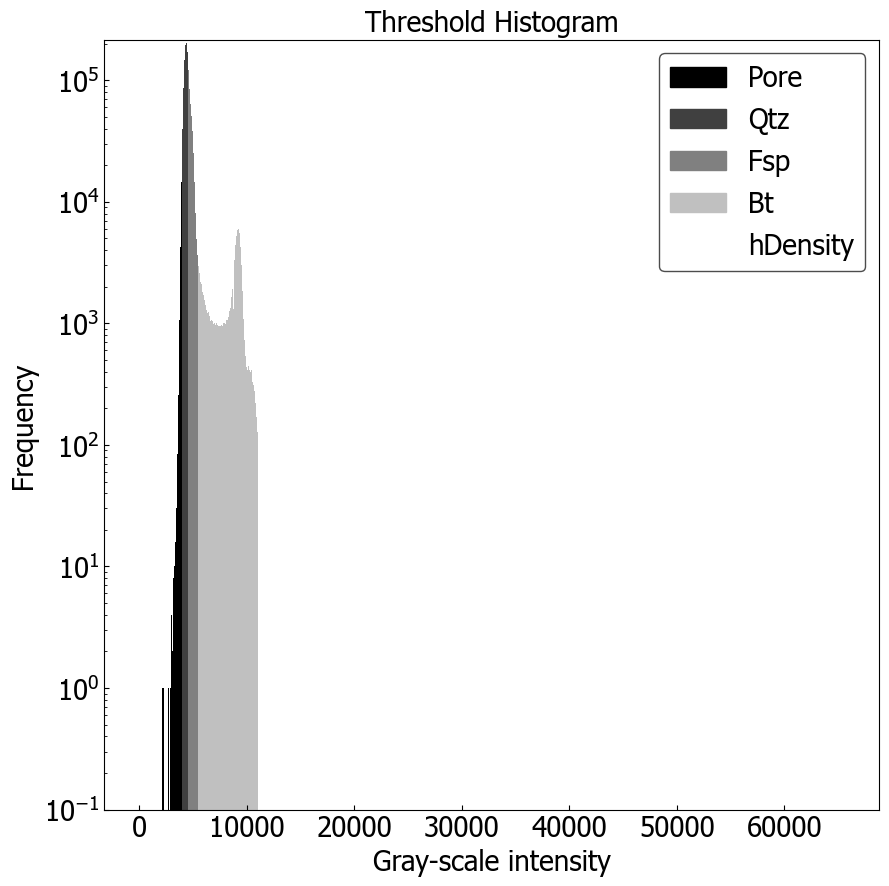

In [ ]:
fig, ax = image.histogram(data=data_raw, paramsfile=params_file_raw, title=None, log_scale='y', dark_mode=False, cmap_set='gray')
save_figure2(fig, filename='figure_400cube')

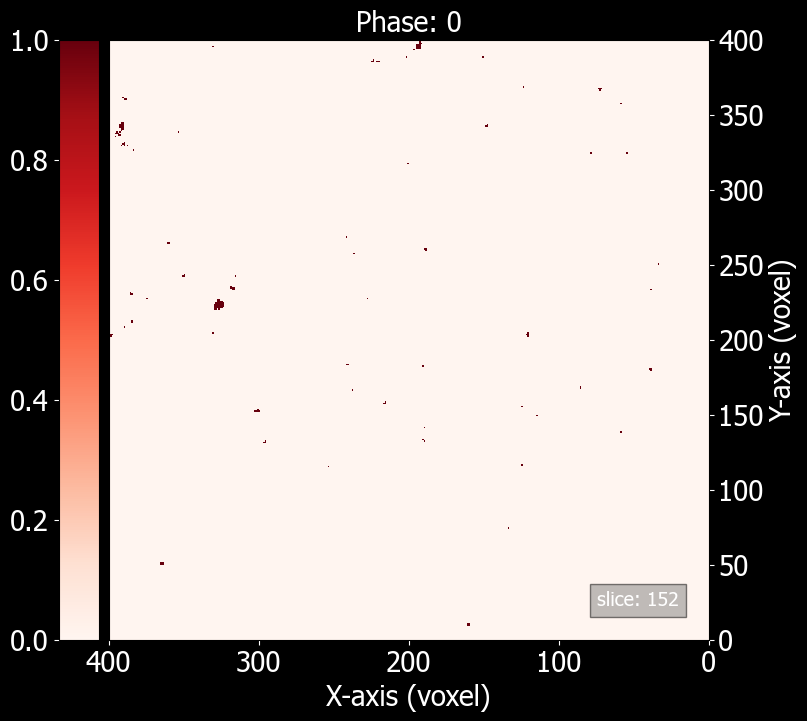

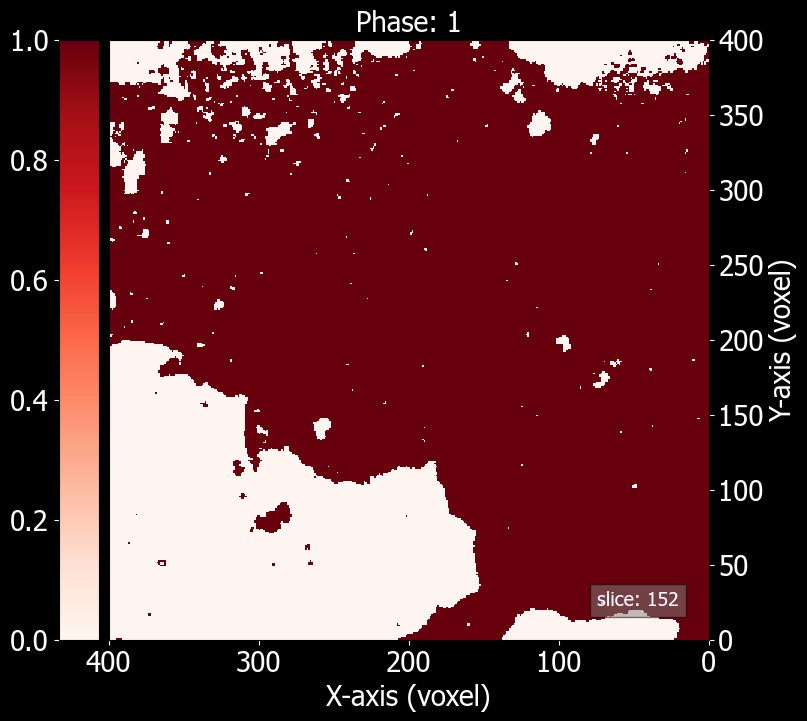

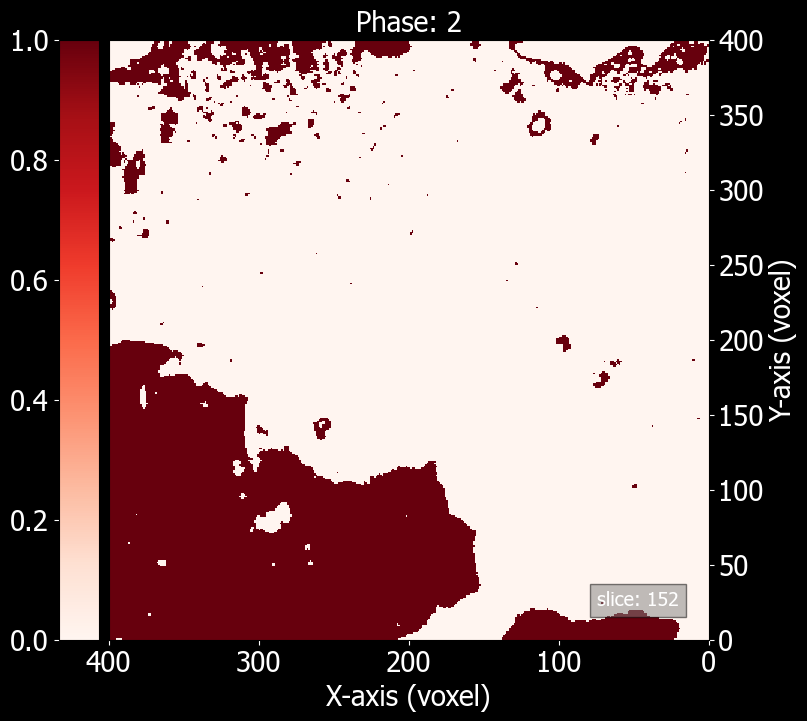

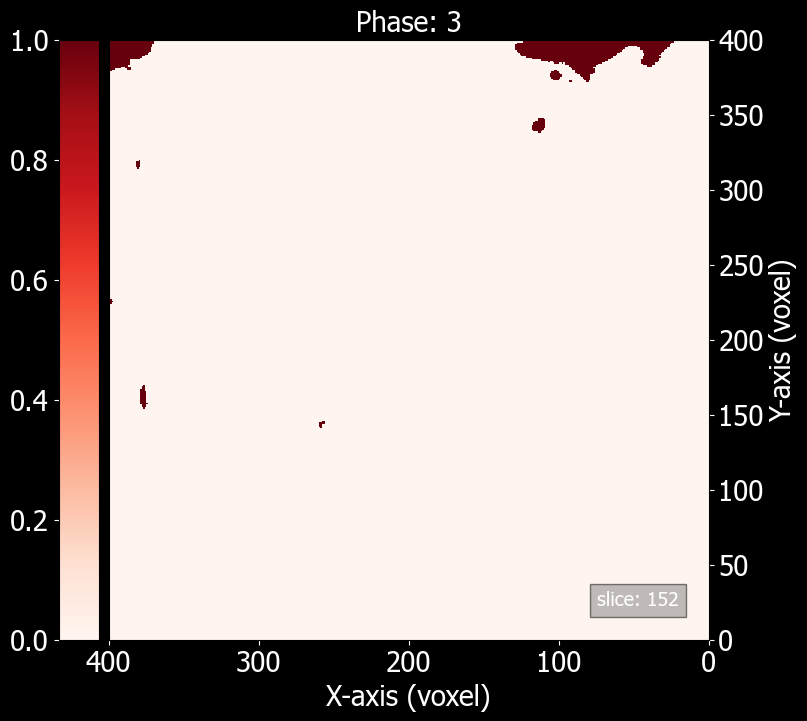

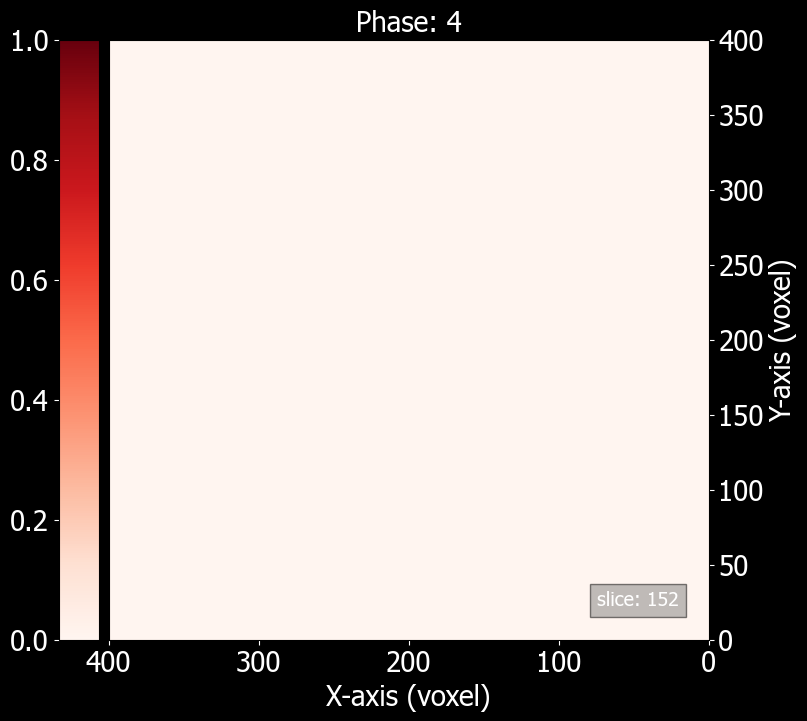

In [16]:
# Get the labels from the segmented data parameters file
labels = label_binary(data=data,paramsfile=params_file_segmented)
fractions = get_phase_fractions(data, labels=labels, paramsfile=params_file_segmented)

In [17]:
# Define threshold ranges for different material phases using threshold_labels
thresholds = {
    "Pore": [0, 4000],
    "Qtz": [4001, 4550],
    "Fsp": [4551, 5500],
    "Bt": [5501, 11000],
    "hDensity": [11001, 65535]
}

# Save thresholds to parameter file
update_parameters_file(paramsfile=params_file_segmented, thresholds=thresholds)

Figure saved at: /Users/martin/Data/CODING_WORLD/PYTHON/Digital_Rock_Physics_Template/examples/output/figure_400cube_histogram_thresholds.png


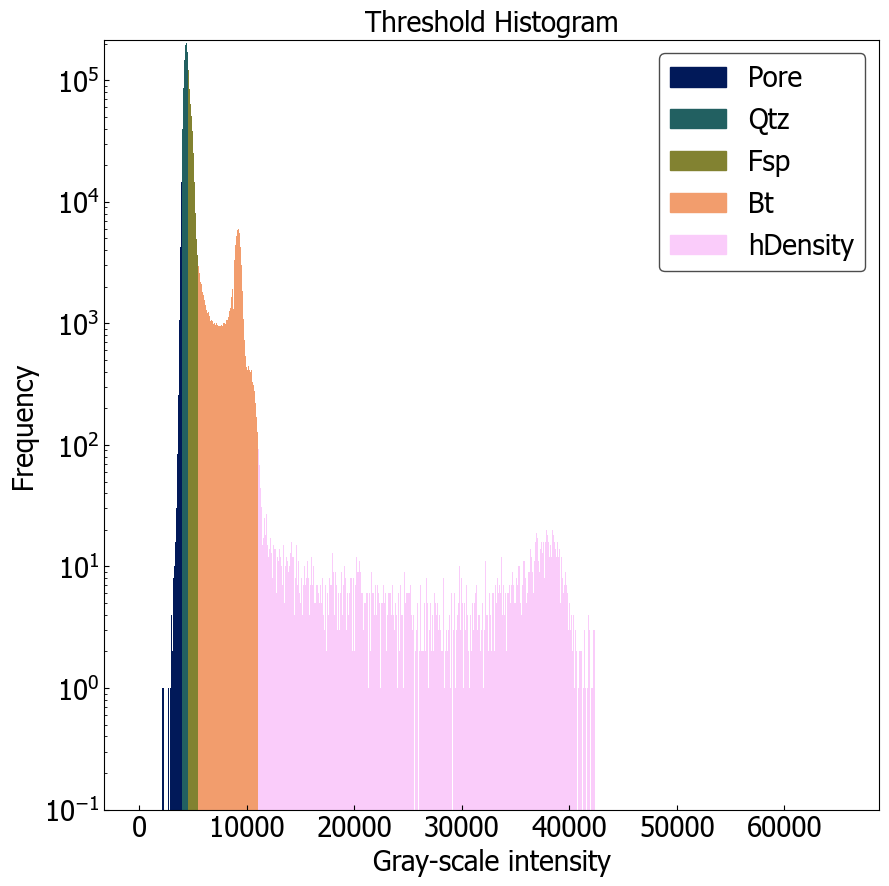

In [22]:
fig, ax = image.histogram(data=data_raw, paramsfile=params_file_raw, title=None, log_scale='y', dark_mode=False, cmap_set=None,thresholds=thresholds)
save_figure2(fig, filename='figure_400cube_histogram_thresholds')